## Import Data and Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [2]:
file = 'SHR76_16.csv'
df = pd.read_csv(file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751785 entries, 0 to 751784
Data columns (total 32 columns):
ID              751785 non-null object
CNTYFIPS        751785 non-null object
Ori             751785 non-null object
State           751785 non-null object
Agency          751785 non-null object
Agentype        751785 non-null object
Source          751785 non-null object
Solved          751785 non-null object
Year            751785 non-null int64
StateName       751785 non-null object
Month           751785 non-null object
Incident        751785 non-null int64
ActionType      751785 non-null object
Homicide        751785 non-null object
Situation       751785 non-null object
VicAge          751785 non-null object
VicSex          751785 non-null object
VicRace         751785 non-null object
VicEthnic       751785 non-null object
OffAge          751785 non-null object
OffSex          751785 non-null object
OffRace         751785 non-null object
OffEthnic       751785 non-null o

## Basic Exploration  
Shape and content of our features

In [ ]:
df.head()

In [ ]:
#look for categorical vars
potential = []
for col in df.columns.values:
    if len(set(df[col])) < 50:
        print(col, set(df[col]))
        potential.append(col)
        
print(potential)

In [ ]:
catagorical = ['Agentype', 'Source', 'Solved', 'Homicide', 'Situation', 'VicSex',
               'VicRace', 'VicEthnic', 'OffSex', 'OffRace', 'OffEthnic', 'Weapon',
               'Relationship', 'Circumstance', 'SubCircum']

numeric = ['Year', 'VicCount', 'OffCount']

df.Year = pd.to_numeric(df.Year)

In [3]:
#how many homicides? ie not negligent manslaughter
print('Homocide:', df[df.Homicide == 'Murder and non-negligent manslaughter'].ID.count())
print('Negligent manslaughter:', df[df.Homicide != 'Murder and non-negligent manslaughter'].ID.count())

Homocide: 741174
Negligent manslaughter: 10611


In [4]:
#how many unsolved cases?
print('Unsolved:', df[df.Solved == 'No'].ID.count())
print('Solved:', df[df.Solved == 'Yes'].ID.count())

Unsolved: 220602
Solved: 531183


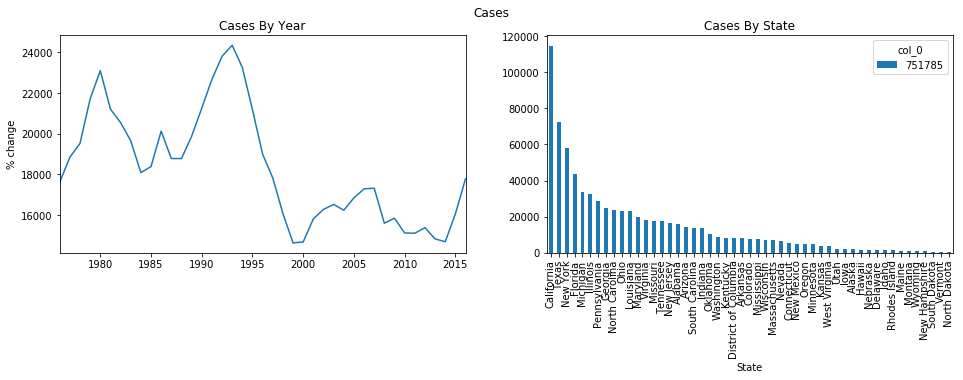

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# Plotting with pandas the barchart for the top 10 losers
ax = (df.Year.value_counts().sort_index().plot(title='Cases By Year', ax=axes[0]))

fig.suptitle('Cases')
# Setting the ylabel to '% change'
# ... YOUR CODE FOR TASK 7 ...
ax.set_ylabel('% change')
# Same as above, but for the top 10 winners
ax = (pd.crosstab(df.State,len(df.State))
        .sort_values(len(df.State), ascending=False)
        .plot(kind='bar', title ='Cases By State', ax=axes[1]))

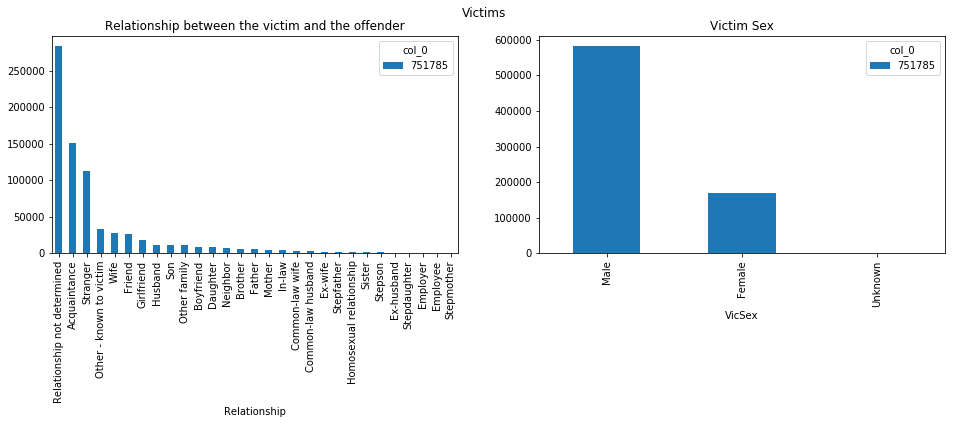

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

fig.suptitle('Victims')

ax = (pd.crosstab(df.Relationship,len(df.Relationship))
        .sort_values(len(df.Relationship), ascending=False)
        .plot(kind='bar', title= 'Relationship between the victim and the offender', ax=axes[0]))

ax = (pd.crosstab(df.VicSex,len(df.VicSex)).sort_values(len(df.VicSex), ascending=False).plot(kind='bar', title='Victim Sex', ax=axes[1]))
